## MARKETING INSIGHTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('merged_marketing_data.csv')
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Tenure_Months,Tenure_Years,Coupon_Code,Discount_pct,Disc_Decimal,GST,Offline_Spend,Online_Spend,actualsale_amount,if_disused_byeveryone
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.710007,6.50,Used,...,12,1.0,ELEC10,10.0,0.1,0.10,4500,2424.50,158.672907,158.672907
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.710007,6.50,Used,...,12,1.0,ELEC10,10.0,0.1,0.10,4500,2424.50,158.672907,158.672907
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.050000,6.50,Used,...,12,1.0,OFF10,10.0,0.1,0.10,4500,2424.50,8.529500,8.529500
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.530001,6.50,Not Used,...,12,1.0,SALE10,10.0,0.1,0.18,4500,2424.50,109.927004,99.584304
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.500000,6.50,Used,...,12,1.0,AIO10,10.0,0.1,0.18,4500,2424.50,24.023000,24.023000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.300003,6.50,Clicked,...,45,3.8,ELEC30,30.0,0.3,0.10,4000,2058.75,139.930003,99.901002
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.919998,6.50,Used,...,45,3.8,SALE30,30.0,0.3,0.18,4000,2058.75,46.907918,46.907918
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.880005,6.50,Used,...,45,3.8,ELEC30,30.0,0.3,0.10,4000,2058.75,123.447604,123.447604
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.519997,6.50,Clicked,...,7,0.6,ELEC30,30.0,0.3,0.10,4000,2058.75,449.359982,316.501987


In [3]:
df.isnull().sum()

CustomerID                 0
Transaction_ID             0
Transaction_Date           0
Product_SKU                0
Product_Description        0
Product_Category           0
Quantity                   0
Avg_Price                  0
Delivery_Charges           0
Coupon_Status              0
Month                      0
Day                        0
Year                       0
Gender                     0
Location                   0
Tenure_Months              0
Tenure_Years               0
Coupon_Code                0
Discount_pct             400
Disc_Decimal             400
GST                        0
Offline_Spend              0
Online_Spend               0
actualsale_amount          0
if_disused_byeveryone      0
dtype: int64

In [4]:
df.dropna(inplace= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             52524 non-null  int64  
 1   Transaction_ID         52524 non-null  int64  
 2   Transaction_Date       52524 non-null  object 
 3   Product_SKU            52524 non-null  object 
 4   Product_Description    52524 non-null  object 
 5   Product_Category       52524 non-null  object 
 6   Quantity               52524 non-null  int64  
 7   Avg_Price              52524 non-null  float64
 8   Delivery_Charges       52524 non-null  float64
 9   Coupon_Status          52524 non-null  object 
 10  Month                  52524 non-null  object 
 11  Day                    52524 non-null  int64  
 12  Year                   52524 non-null  int64  
 13  Gender                 52524 non-null  object 
 14  Location               52524 non-null  object 
 15  Tenure_

In [6]:
import datetime
df['Transaction_Date'] =pd.to_datetime(df['Transaction_Date'], format='%m/%d/%Y')

In [7]:
df['Discount_pct'] = pd.to_numeric(df['Discount_pct'], errors='coerce').fillna(0).astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CustomerID             52524 non-null  int64         
 1   Transaction_ID         52524 non-null  int64         
 2   Transaction_Date       52524 non-null  datetime64[ns]
 3   Product_SKU            52524 non-null  object        
 4   Product_Description    52524 non-null  object        
 5   Product_Category       52524 non-null  object        
 6   Quantity               52524 non-null  int64         
 7   Avg_Price              52524 non-null  float64       
 8   Delivery_Charges       52524 non-null  float64       
 9   Coupon_Status          52524 non-null  object        
 10  Month                  52524 non-null  object        
 11  Day                    52524 non-null  int64         
 12  Year                   52524 non-null  int64         
 13  Gender

## customer segmentation
#### heuristic segmentation:
- RFM stands for recency,frequency,monetary value. we use this method to segregate customers into segments. Recency: how recently customer purchased. frequency: how frequently the customer is purchasing. monnetary value: How much does a customer spend.
#### using k - means clustering
- K-means clustering is an unsupervised machine learning algorithm,which groups the unlabeled dataset into different clusters

### RFM analysis

In [9]:
#import needed libraries
import pandas as pd
import numpy as np
import datetime as dt

In [10]:
#recency
df_recency = df.groupby(by ='CustomerID',as_index = False)['Transaction_Date'].max()
df_recency

,CustomerID,Transaction_Date
0,12346,2019-09-15
1,12347,2019-11-02
2,12348,2019-10-19
3,12350,2019-12-14
4,12356,2019-09-15
...,...,...
1463,18259,2019-04-05
1464,18260,2019-10-05
1465,18269,2019-06-20
1466,18277,2019-10-23


In [11]:
recent_date = df_recency['Transaction_Date'].max()
recent_date

Timestamp('2019-12-31 00:00:00')

In [12]:
df_recency['Recency'] = df_recency['Transaction_Date'].apply(lambda x:(recent_date-x).days)
df_recency

,CustomerID,Transaction_Date,Recency
0,12346,2019-09-15,107
1,12347,2019-11-02,59
2,12348,2019-10-19,73
3,12350,2019-12-14,17
4,12356,2019-09-15,107
...,...,...,...
1463,18259,2019-04-05,270
1464,18260,2019-10-05,87
1465,18269,2019-06-20,194
1466,18277,2019-10-23,69


In [13]:
#calculate frequency
df_frequency = df.groupby(by = 'CustomerID',as_index = False)['Transaction_Date'].count()
df_frequency.columns =['CustomerID','Frequency']
df_frequency

,CustomerID,Frequency
0,12346,2
1,12347,59
2,12348,23
3,12350,17
4,12356,36
...,...,...
1463,18259,6
1464,18260,39
1465,18269,8
1466,18277,1


In [14]:
#calculate monetary value
df_monetary_value = df.groupby(by = 'CustomerID',as_index=False)['actualsale_amount'].sum()
df_monetary_value.columns= ['CustomerID','Monetary_value']
df_monetary_value

,CustomerID,Monetary_value
0,12346,174.981740
1,12347,15655.726374
2,12348,1689.555948
3,12350,1467.435313
4,12356,2007.429001
...,...,...
1463,18259,833.429787
1464,18260,2942.959722
1465,18269,166.907499
1466,18277,333.800000


In [15]:
rfm_analysis = df_recency.merge(df_frequency, on = 'CustomerID')
rfm_analysis = rfm_analysis.merge(df_monetary_value,on = 'CustomerID').drop(columns = 'Transaction_Date')
rfm_analysis

,CustomerID,Recency,Frequency,Monetary_value
0,12346,107,2,174.981740
1,12347,59,59,15655.726374
2,12348,73,23,1689.555948
3,12350,17,17,1467.435313
4,12356,107,36,2007.429001
...,...,...,...,...
1463,18259,270,6,833.429787
1464,18260,87,39,2942.959722
1465,18269,194,8,166.907499
1466,18277,69,1,333.800000


In [16]:
#rank the customers
rfm_analysis['rec_rank']= rfm_analysis['Recency'].rank(ascending = False)
rfm_analysis['freq_rank']= rfm_analysis['Frequency'].rank(ascending = True)
rfm_analysis['mon_rank']= rfm_analysis['Monetary_value'].rank(ascending=True)

In [17]:
rfm_analysis

,CustomerID,Recency,Frequency,Monetary_value,rec_rank,freq_rank,mon_rank
0,12346,107,2,174.981740,852.0,90.5,129.0
1,12347,59,59,15655.726374,1078.0,1219.0,1433.0
2,12348,73,23,1689.555948,1008.5,781.0,650.0
3,12350,17,17,1467.435313,1359.0,631.5,602.0
4,12356,107,36,2007.429001,852.0,996.5,734.0
...,...,...,...,...,...,...,...
1463,18259,270,6,833.429787,206.5,236.0,387.0
1464,18260,87,39,2942.959722,945.0,1028.0,917.0
1465,18269,194,8,166.907499,460.5,304.5,124.0
1466,18277,69,1,333.800000,1027.0,33.5,196.5


In [18]:
#normalize it
rfm_analysis['rec_norm_rank']=(rfm_analysis['rec_rank']/rfm_analysis['rec_rank'].max())*100
rfm_analysis['freq_norm_rank']=(rfm_analysis['freq_rank']/rfm_analysis['freq_rank'].max())*100
rfm_analysis['mon_norm_rank']=(rfm_analysis['mon_rank']/rfm_analysis['mon_rank'].max())*100
                                

In [19]:
rfm_analysis

,CustomerID,Recency,Frequency,Monetary_value,rec_rank,freq_rank,mon_rank,rec_norm_rank,freq_norm_rank,mon_norm_rank
0,12346,107,2,174.981740,852.0,90.5,129.0,58.137155,6.164850,8.787466
1,12347,59,59,15655.726374,1078.0,1219.0,1433.0,73.558512,83.038147,97.615804
2,12348,73,23,1689.555948,1008.5,781.0,650.0,68.816104,53.201635,44.277929
3,12350,17,17,1467.435313,1359.0,631.5,602.0,92.732856,43.017711,41.008174
4,12356,107,36,2007.429001,852.0,996.5,734.0,58.137155,67.881471,50.000000
...,...,...,...,...,...,...,...,...,...,...
1463,18259,270,6,833.429787,206.5,236.0,387.0,14.090754,16.076294,26.362398
1464,18260,87,39,2942.959722,945.0,1028.0,917.0,64.483112,70.027248,62.465940
1465,18269,194,8,166.907499,460.5,304.5,124.0,31.422723,20.742507,8.446866
1466,18277,69,1,333.800000,1027.0,33.5,196.5,70.078472,2.282016,13.385559


In [20]:
rfm_analysis.drop(columns = ['rec_rank','freq_rank','mon_rank'],inplace = True)
rfm_analysis


,CustomerID,Recency,Frequency,Monetary_value,rec_norm_rank,freq_norm_rank,mon_norm_rank
0,12346,107,2,174.981740,58.137155,6.164850,8.787466
1,12347,59,59,15655.726374,73.558512,83.038147,97.615804
2,12348,73,23,1689.555948,68.816104,53.201635,44.277929
3,12350,17,17,1467.435313,92.732856,43.017711,41.008174
4,12356,107,36,2007.429001,58.137155,67.881471,50.000000
...,...,...,...,...,...,...,...
1463,18259,270,6,833.429787,14.090754,16.076294,26.362398
1464,18260,87,39,2942.959722,64.483112,70.027248,62.465940
1465,18269,194,8,166.907499,31.422723,20.742507,8.446866
1466,18277,69,1,333.800000,70.078472,2.282016,13.385559


In [21]:
#calculate rfm score
rfm_analysis['Total_rfm_score']=0.15*rfm_analysis['rec_norm_rank']+0.28*rfm_analysis['freq_norm_rank']+0.57*rfm_analysis['mon_norm_rank']
rfm_analysis['Total_rfm_score']*=0.05
rfm_analysis= rfm_analysis.round(2)
score = rfm_analysis[['CustomerID','Total_rfm_score']]
score

,CustomerID,Total_rfm_score
0,12346,0.77
1,12347,4.50
2,12348,2.52
3,12350,2.47
4,12356,2.81
...,...,...
1463,18259,1.08
1464,18260,3.24
1465,18269,0.77
1466,18277,0.94


In [22]:
score.describe()

,CustomerID,Total_rfm_score
count,1468.000000,1468.000000
mean,15314.386240,2.502316
std,1744.000367,1.281606
min,12346.000000,0.040000
25%,13830.500000,1.450000
50%,15300.000000,2.470000
75%,16882.250000,3.580000
max,18283.000000,4.990000


In [23]:
score['Customer_segments'] = score['Total_rfm_score'].apply(
    lambda x: 'Premium' if x >= 4 else ('Silver' if x >= 3 else ('Gold' if x >= 2 else 'Standard')))

C:\Users\sushmi\AppData\Local\Temp\ipykernel_728\1889566973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['Customer_segments'] = score['Total_rfm_score'].apply(


In [24]:
score

,CustomerID,Total_rfm_score,Customer_segments
0,12346,0.77,Standard
1,12347,4.50,Premium
2,12348,2.52,Gold
3,12350,2.47,Gold
4,12356,2.81,Gold
...,...,...,...
1463,18259,1.08,Standard
1464,18260,3.24,Silver
1465,18269,0.77,Standard
1466,18277,0.94,Standard


In [25]:
score['Customer_segments'].value_counts()

Customer_segments
Standard    569
Silver      350
Gold        327
Premium     222
Name: count, dtype: int64

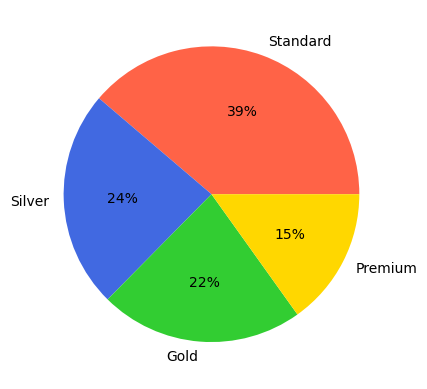

In [26]:
plt.pie(score.Customer_segments.value_counts(),labels = score.Customer_segments.value_counts().index,autopct='%.0f%%',colors = ['#FF6347', '#4169E1', '#32CD32', '#FFD700'])
plt.show()

### Calculate customer lifetime value

In [28]:
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Tenure_Months,Tenure_Years,Coupon_Code,Discount_pct,Disc_Decimal,GST,Offline_Spend,Online_Spend,actualsale_amount,if_disused_byeveryone
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.710007,6.50,Used,...,12,1.0,ELEC10,10,0.1,0.10,4500,2424.50,158.672907,158.672907
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.710007,6.50,Used,...,12,1.0,ELEC10,10,0.1,0.10,4500,2424.50,158.672907,158.672907
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.050000,6.50,Used,...,12,1.0,OFF10,10,0.1,0.10,4500,2424.50,8.529500,8.529500
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.530001,6.50,Not Used,...,12,1.0,SALE10,10,0.1,0.18,4500,2424.50,109.927004,99.584304
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.500000,6.50,Used,...,12,1.0,AIO10,10,0.1,0.18,4500,2424.50,24.023000,24.023000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.300003,6.50,Clicked,...,45,3.8,ELEC30,30,0.3,0.10,4000,2058.75,139.930003,99.901002
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.919998,6.50,Used,...,45,3.8,SALE30,30,0.3,0.18,4000,2058.75,46.907918,46.907918
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.880005,6.50,Used,...,45,3.8,ELEC30,30,0.3,0.10,4000,2058.75,123.447604,123.447604
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.519997,6.50,Clicked,...,7,0.6,ELEC30,30,0.3,0.10,4000,2058.75,449.359982,316.501987


In [29]:
df['actualsale_amount'].describe()

count    52524.000000
mean       102.056382
std        172.445483
min          4.603500
25%         20.160000
50%         45.636200
75%        137.400000
max       8979.274892
Name: actualsale_amount, dtype: float64

In [30]:
df['ltv'] = df['actualsale_amount'].apply(lambda x: 'high_val' if x>=1000 else('medium_val' if x>=100 else('low_val')))
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Tenure_Years,Coupon_Code,Discount_pct,Disc_Decimal,GST,Offline_Spend,Online_Spend,actualsale_amount,if_disused_byeveryone,ltv
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.710007,6.50,Used,...,1.0,ELEC10,10,0.1,0.10,4500,2424.50,158.672907,158.672907,medium_val
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.710007,6.50,Used,...,1.0,ELEC10,10,0.1,0.10,4500,2424.50,158.672907,158.672907,medium_val
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.050000,6.50,Used,...,1.0,OFF10,10,0.1,0.10,4500,2424.50,8.529500,8.529500,low_val
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.530001,6.50,Not Used,...,1.0,SALE10,10,0.1,0.18,4500,2424.50,109.927004,99.584304,medium_val
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.500000,6.50,Used,...,1.0,AIO10,10,0.1,0.18,4500,2424.50,24.023000,24.023000,low_val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.300003,6.50,Clicked,...,3.8,ELEC30,30,0.3,0.10,4000,2058.75,139.930003,99.901002,medium_val
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.919998,6.50,Used,...,3.8,SALE30,30,0.3,0.18,4000,2058.75,46.907918,46.907918,low_val
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.880005,6.50,Used,...,3.8,ELEC30,30,0.3,0.10,4000,2058.75,123.447604,123.447604,medium_val
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.519997,6.50,Clicked,...,0.6,ELEC30,30,0.3,0.10,4000,2058.75,449.359982,316.501987,medium_val


In [31]:
df['ltv'].value_counts()

ltv
low_val       33998
medium_val    18375
high_val        151
Name: count, dtype: int64

### predicting customer lifetime value using a classification model (Random forest classification)

In [33]:
data = df[['Quantity', 'Avg_Price',
       'Delivery_Charges','Tenure_Years', 
       'Discount_pct', 'Disc_Decimal', 'GST', 'Offline_Spend', 'Online_Spend',
       'actualsale_amount','ltv']]

In [34]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
X = data.iloc[:,:-2]
y = data.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(report)


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

    high_val       0.95      0.54      0.69        37
     low_val       0.98      0.98      0.98      6822
  medium_val       0.96      0.97      0.96      3646

    accuracy                           0.97     10505
   macro avg       0.96      0.83      0.88     10505
weighted avg       0.97      0.97      0.97     10505



In [35]:
import pandas as pd

# Create a DataFrame with actual and predicted values
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(df_comparison.head(20))  # Display the first 20 rows, adjust as needed


           Actual   Predicted
42312     low_val     low_val
33826     low_val     low_val
551       low_val     low_val
51260  medium_val  medium_val
8278   medium_val  medium_val
20002     low_val     low_val
33133     low_val     low_val
11927     low_val     low_val
12723     low_val     low_val
15744  medium_val  medium_val
46260     low_val     low_val
8269   medium_val  medium_val
11741     low_val     low_val
34710     low_val     low_val
24076     low_val     low_val
49886  medium_val  medium_val
26227  medium_val  medium_val
14398     low_val     low_val
21324     low_val     low_val
31692     low_val     low_val


### cross selling products using association rule mining techniques using apriori

In [37]:
from mlxtend.frequent_patterns import apriori, association_rules 

In [38]:
#stripping the extra spaces
df['Product_Description'] =df['Product_Description'].str.strip()

In [39]:
df['Location'].value_counts()

Location
Chicago          18240
California       16008
New York         11097
New Jersey        4470
Washington DC     2709
Name: count, dtype: int64

In [40]:
chicago_basket_analysis = (df[df['Location'] =="Chicago"] 
          .groupby(['Transaction_ID', 'Product_Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Transaction_ID')) 
  

california_basket_analysis = (df[df['Location'] =="California"] 
          .groupby(['Transaction_ID', 'Product_Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Transaction_ID')) 
  

newyork_basket_analysis = (df[df['Location'] =="New York"] 
          .groupby(['Transaction_ID', 'Product_Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Transaction_ID')) 
  
newjersey_basket_analysis = (df[df['Location'] =="New Jersey"] 
          .groupby(['Transaction_ID', 'Product_Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Transaction_ID')) 

washington_basket_analysis = (df[df['Location'] =="Washington DC"] 
          .groupby(['Transaction_ID', 'Product_Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Transaction_ID')) 

In [41]:
chicago_basket_analysis

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 17oz Stainless Steel Sport Bottle,...,YouTube Trucker Hat,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16692,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [43]:
basket_encoded = chicago_basket_analysis.applymap(hot_encode) 
chicago_basket = basket_encoded 
basket_encoded = california_basket_analysis.applymap(hot_encode) 
cali_basket = basket_encoded 
basket_encoded = newyork_basket_analysis.applymap(hot_encode) 
ny_basket = basket_encoded  
basket_encoded = newjersey_basket_analysis.applymap(hot_encode) 
nj_basket = basket_encoded 
basket_encoded = washington_basket_analysis.applymap(hot_encode) 
dc_basket = basket_encoded 

C:\Users\sushmi\AppData\Local\Temp\ipykernel_728\3558264175.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = chicago_basket_analysis.applymap(hot_encode)
C:\Users\sushmi\AppData\Local\Temp\ipykernel_728\3558264175.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = california_basket_analysis.applymap(hot_encode)
C:\Users\sushmi\AppData\Local\Temp\ipykernel_728\3558264175.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = newyork_basket_analysis.applymap(hot_encode)
C:\Users\sushmi\AppData\Local\Temp\ipykernel_728\3558264175.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = newjersey_basket_analysis.applymap(hot_encode)
C:\Users\sushmi\AppData\Local\Temp\ipykernel_728\3558264175.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.

In [ ]:
#frequent intems bought together country wise

In [44]:
#chicago 
freq_items = apriori(chicago_basket, min_support = 0.002, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(freq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

C:\Users\sushmi\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
60,(Google Tee Green),(Google Tee Blue),0.006176,0.007941,0.002868,0.464286,58.467758,0.002818,1.851844,0.989005
5,(Android Sticker Sheet Ultra Removable),(Google Laptop and Cell Phone Stickers),0.008051,0.030771,0.003419,0.424658,13.800609,0.003171,1.684612,0.935068
82,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Cam Outdoor Security Camera - USA),0.005404,0.123966,0.002206,0.408163,3.292541,0.001536,1.480195,0.700067
43,(Keyboard DOT Sticker),(Google Laptop and Cell Phone Stickers),0.006617,0.030771,0.002647,0.400000,12.999283,0.002443,1.615382,0.929222
12,(Pen Pencil & Highlighter Set),(Colored Pencil Set),0.006176,0.007610,0.002426,0.392857,51.623706,0.002379,1.634525,0.986723
...,...,...,...,...,...,...,...,...,...,...
81,(Nest Cam Outdoor Security Camera - USA),"(Nest Cam Indoor Security Camera - USA, Nest L...",0.123966,0.008051,0.003088,0.024911,3.094087,0.002090,1.017291,0.772576
93,(Nest Cam Outdoor Security Camera - USA),(Nest Protect Smoke + CO White Battery Alarm-U...,0.123966,0.008823,0.002426,0.019573,2.218350,0.001333,1.010964,0.626933
86,(Nest Cam Indoor Security Camera - USA),(Nest Protect Smoke + CO White Battery Alarm-U...,0.118893,0.007500,0.002206,0.018553,2.473808,0.001314,1.011262,0.676155
87,(Nest Cam Outdoor Security Camera - USA),(Nest Protect Smoke + CO White Battery Alarm-U...,0.123966,0.005404,0.002206,0.017794,3.292541,0.001536,1.012614,0.794813


#### insights on products focusing in chicago
- Customers who purchase the "Google Tee Green" are highly likely (46.43% confidence) to also purchase the "Google Tee Blue," with a significant lift of 58.47.
- he rule suggests that customers who purchase the "Android Sticker Sheet Ultra Removable" are highly likely (42.47% confidence) to also purchase the "Google Laptop and Cell Phone Stickers," with a lift of 13.80.
- The rule indicates a strong association between purchasing the "Pen Pencil & Highlighter Set" and also purchasing the "Colored Pencil Set," with a high confidence of 39.29% and a lift of 51.62.
- Customers who purchase the "Nest Cam Outdoor Security Camera - USA" are moderately likely (2.49% confidence) to also purchase the combination of "Nest Cam Indoor Security Camera - USA" and "Nest Learning Thermostat 3rd Gen-USA - Stainless Steel," with a lift of 3.09.

In [45]:
#cali
freq_items = apriori(cali_basket, min_support = 0.002, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(freq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

C:\Users\sushmi\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
77,(Nest Detect - USA),(Nest Secure Alarm System Starter Pack - USA),0.004829,0.022366,0.002669,0.552632,24.708283,0.002561,2.185299,0.964184
41,(Keyboard DOT Sticker),(Google Laptop and Cell Phone Stickers),0.007244,0.031389,0.003177,0.438596,13.972938,0.002950,1.725338,0.935207
9,(Android Sticker Sheet Ultra Removable),(Google Laptop and Cell Phone Stickers),0.006735,0.031389,0.002796,0.415094,13.224200,0.002584,1.656012,0.930649
63,(Google Tee Blue),(Google Tee Green),0.005083,0.005973,0.002033,0.400000,66.970213,0.002003,1.656712,0.990101
6,(Android Men's Short Sleeve Hero Tee Heather),(Google Men's Vintage Badge Tee White),0.005083,0.010548,0.002033,0.400000,37.922892,0.001980,1.649087,0.978605
...,...,...,...,...,...,...,...,...,...,...
73,(Nest Cam Outdoor Security Camera - USA),(Nest Protect Smoke + CO White Wired Alarm-USA),0.127716,0.038633,0.005083,0.039801,1.030244,0.000149,1.001217,0.033654
67,(Nest Cam Outdoor Security Camera - USA),(Nest Cam IQ - USA),0.127716,0.024145,0.003558,0.027861,1.153873,0.000475,1.003822,0.152878
75,(Nest Cam Outdoor Security Camera - USA),(Nest Secure Alarm System Starter Pack - USA),0.127716,0.022366,0.002923,0.022886,1.023219,0.000066,1.000531,0.026015
92,(Nest Cam Indoor Security Camera - USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.121235,0.011437,0.002160,0.017820,1.558036,0.000774,1.006498,0.407579


#### insights on products focusing in california
- Customers who purchase "Nest Detect - USA" are highly likely (55.26% confidence) to also purchase the "Nest Secure Alarm System Starter Pack - USA," with a significant lift of 24.71.
- Customers who buy the "Keyboard DOT Sticker" are highly likely (43.86% confidence) to also purchase the "Google Laptop and Cell Phone Stickers," with a lift of 13.97.
- The rule suggests that customers who purchase the "Android Sticker Sheet Ultra Removable" are highly likely (41.51% confidence) to also purchase the "Google Laptop and Cell Phone Stickers," with a lift of 13.22.
- Customers who buy the "Google Tee Blue" are highly likely (40.00% confidence) to also purchase the "Google Tee Green," with a remarkable lift of 66.97.
- Customers who purchase the "Nest Cam Outdoor Security Camera - USA" are moderately likely (3.98% confidence) to also purchase the "Nest Protect Smoke + CO White Wired Alarm-USA," with a lift of 1.03.

In [46]:
#ny
freq_items = apriori(ny_basket, min_support = 0.002, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(freq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

C:\Users\sushmi\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Android Sticker Sheet Ultra Removable),(Google Laptop and Cell Phone Stickers),0.010024,0.032076,0.004556,0.454545,14.170971,0.004235,1.774528,0.938844
70,(Google Women's Scoop Neck Tee White),(Google Women's Scoop Neck Tee Black),0.007290,0.007472,0.003098,0.425000,56.877439,0.003044,1.726135,0.989633
71,(Google Women's Scoop Neck Tee Black),(Google Women's Scoop Neck Tee White),0.007472,0.007290,0.003098,0.414634,56.877439,0.003044,1.695880,0.989814
98,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Cam Outdoor Security Camera - USA),0.005832,0.134135,0.002369,0.406250,3.028660,0.001587,1.458299,0.673750
35,(Google Doodle Decal),(Google Laptop and Cell Phone Stickers),0.012028,0.032076,0.004738,0.393939,12.281508,0.004353,1.597075,0.929760
...,...,...,...,...,...,...,...,...,...,...
89,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Protect Smoke + CO White Wired Alarm-USA),0.134317,0.041188,0.005832,0.043419,1.054166,0.000300,1.002332,0.059355
96,(Nest Cam Indoor Security Camera - USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.127757,0.011299,0.003098,0.024251,2.146220,0.001655,1.013274,0.612288
97,(Nest Cam Outdoor Security Camera - USA),"(Nest Cam Indoor Security Camera - USA, Nest L...",0.134135,0.009295,0.003098,0.023098,2.485054,0.001851,1.014129,0.690170
102,(Nest Cam Indoor Security Camera - USA),(Nest Protect Smoke + CO White Battery Alarm-U...,0.127757,0.007472,0.002369,0.018545,2.481855,0.001415,1.011282,0.684529


#### insights on products focusing in new york
- The rule suggests that customers who purchase the "Android Sticker Sheet Ultra Removable" are highly likely (45.45% confidence) to also purchase the "Google Laptop and Cell Phone Stickers," with a lift of 14.17.
- This rule indicates a strong association between purchasing the "Google Women's Scoop Neck Tee White" and also purchasing the "Google Women's Scoop Neck Tee Black," with a high confidence of 42.50% and a lift of 56.88.
- Customers who purchase the "Nest Protect Smoke + CO White Battery Alarm-USA" are likely (40.62% confidence) to also purchase the "Nest Cam Outdoor Security Camera - USA," with a lift of 3.03.
- This rule indicates a weak association between purchasing the "Nest Learning Thermostat 3rd Gen-USA - Stainless Steel" and also purchasing the "Nest Protect Smoke + CO White Wired Alarm-USA," with a low confidence of 4.34% and a lift of 1.05.
- Customers who purchase the "Nest Cam Indoor Security Camera - USA" are moderately likely (2.43% confidence) to also purchase the "Nest Learning Thermostat 3rd Gen-USA - Stainless Steel," with a lift of 2.15.

In [47]:
#nj
freq_items = apriori(nj_basket, min_support = 0.002, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(freq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

C:\Users\sushmi\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(22 oz Android Bottle),(Google 22 oz Water Bottle),0.006631,0.035367,0.004863,0.733333,20.735000,0.004628,3.617374,0.958126
16,(Pen Pencil & Highlighter Set),(Four Color Retractable Pen),0.004863,0.014589,0.003095,0.636364,43.619835,0.003024,2.709881,0.981849
111,"(Nest Cam Indoor Security Camera - USA, Nest L...",(Nest Cam Outdoor Security Camera - USA),0.003537,0.116711,0.002210,0.625000,5.355114,0.001798,2.355438,0.816149
89,(Nest Cam IQ Outdoor - USA (Preorder)),(Nest Secure Alarm System Starter Pack - USA),0.005747,0.020778,0.002653,0.461538,22.212766,0.002533,1.818555,0.960501
39,(Google Doodle Decal),(Google Laptop and Cell Phone Stickers),0.011936,0.028736,0.004863,0.407407,14.177778,0.004520,1.639009,0.940696
...,...,...,...,...,...,...,...,...,...,...
109,(Nest Cam Outdoor Security Camera - USA),"(Nest Cam Indoor Security Camera - USA, Nest L...",0.116711,0.011052,0.003979,0.034091,3.084545,0.002689,1.023852,0.765098
108,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,"(Nest Cam Indoor Security Camera - USA, Nest C...",0.128205,0.025641,0.003979,0.031034,1.210345,0.000691,1.005566,0.199346
107,(Nest Cam Indoor Security Camera - USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.133510,0.012821,0.003979,0.029801,2.324503,0.002267,1.017502,0.657596
114,(Nest Cam Outdoor Security Camera - USA),"(Nest Cam Indoor Security Camera - USA, Nest L...",0.116711,0.003537,0.002210,0.018939,5.355114,0.001798,1.015700,0.920721


#### insights on products focusing in new jersey
- Customers who purchase the "22 oz Android Bottle" are highly likely (73.33% confidence) to also purchase the "Google 22 oz Water Bottle," with a substantial lift of 20.74.
- The rule indicates a strong association between purchasing the "Pen Pencil & Highlighter Set" and also purchasing the "Four Color Retractable Pen," with a high confidence of 63.64% and a lift of 43.62.
- Customers who purchase this combination of products are likely (62.50% confidence) to also purchase the "Nest Cam Outdoor Security Camera - USA," with a lift of 5.36.
- The rule suggests that customers who purchase the "Nest Cam IQ Outdoor - USA (Preorder)" are highly likely (46.15% confidence) to also purchase the "Nest Secure Alarm System Starter Pack - USA," with a lift of 22.21.
- Customers who purchase the "Nest Cam Outdoor Security Camera - USA" are moderately likely (3.41% confidence) to also purchase the combination of "Nest Cam Indoor Security Camera - USA" and "Nest Learning Thermostat 3rd Gen-USA - Stainless Steel," with a lift of 3.08.

In [48]:
#dc
freq_items = apriori(dc_basket, min_support = 0.002, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(freq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

C:\Users\sushmi\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(Android Large Removable Sticker Sheet),(Android Small Removable Sticker Sheet),0.002132,0.002843,0.002132,1.000000,351.750000,0.002126,inf,0.999288
196,"(Google Women's Scoop Neck Tee White, Google W...",(Google Women's Vintage Hero Tee Platinum),0.002132,0.004264,0.002132,1.000000,234.500000,0.002123,inf,0.997863
198,"(Google Women's Vintage Hero Tee Lavender, Goo...",(Google Women's Scoop Neck Tee White),0.002132,0.008529,0.002132,1.000000,117.250000,0.002114,inf,0.993590
185,"(Google Laptop and Cell Phone Stickers, Keyboa...",(Google Doodle Decal),0.002132,0.013504,0.002132,1.000000,74.052632,0.002103,inf,0.988604
190,(Google Men's 100% Cotton Short Sleeve Hero Te...,(Google Men's 100% Cotton Short Sleeve Hero Te...,0.002132,0.013504,0.002132,1.000000,74.052632,0.002103,inf,0.988604
...,...,...,...,...,...,...,...,...,...,...
156,(Nest Protect Smoke + CO White Battery Alarm-USA),(Nest Thermostat E - USA),0.061834,0.031272,0.002132,0.034483,1.102665,0.000199,1.003325,0.099242
210,(Nest Cam Indoor Security Camera - USA),(Nest Protect Smoke + CO White Battery Alarm-U...,0.138593,0.009240,0.003554,0.025641,2.775148,0.002273,1.016833,0.742574
211,(Nest Cam Outdoor Security Camera - USA),(Nest Protect Smoke + CO White Battery Alarm-U...,0.141436,0.004975,0.003554,0.025126,5.050251,0.002850,1.020670,0.934106
204,(Nest Cam Indoor Security Camera - USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.138593,0.011372,0.002132,0.015385,1.352885,0.000556,1.004076,0.302805


#### insights on products focusing only in washington DC
- The table includes antecedents (items that are present before the purchase) and consequents (items that are likely to be purchased together with the antecedents).Metrics such as support, confidence, lift, leverage, conviction, and Zhang's metric provide insights into the strength and significance of the associations.
- Some notable associations with high confidence and lift include: 
   (Android Large Removable Sticker Sheet) → (Android Small Removable Sticker Sheet) with a confidence of 1.0 and a lift of 351.75.
  (Google Women's Scoop Neck Tee White, Google Women's Vintage Hero Tee Platinum) → (Google Women's Vintage Hero Tee Platinum) with a confidence of 1.0 and a lift of 234.5.
  (Google Laptop and Cell Phone Stickers, Keyboard Decal, Google Doodle Decal) → (Google Doodle Decal) with a confidence of 1.0 and a lift of 74.05.

- Zhang's Metric:
  Zhang's metric provides a measure of the interestingness of the association rules. Higher values indicate stronger associations. Notable high values include (Android Large Removable Sticker Sheet) → (Android Small Removable Sticker Sheet) with a Zhang's metric of 0.9993 and (Google Women's Scoop Neck Tee White, Google Women's Vintage Hero Tee Platinum) → (Google Women's Vintage Hero Tee Platinum) with a metric of 0.9979.

In [49]:
#cohort nalysis

In [50]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Day', 'Year', 'Gender',
       'Location', 'Tenure_Months', 'Tenure_Years', 'Coupon_Code',
       'Discount_pct', 'Disc_Decimal', 'GST', 'Offline_Spend', 'Online_Spend',
       'actualsale_amount', 'if_disused_byeveryone', 'ltv'],
      dtype='object')

In [51]:
df['Tenure_Months']

0        12
1        12
2        12
3        12
4        12
         ..
52919    45
52920    45
52921    45
52922     7
52923     7
Name: Tenure_Months, Length: 52524, dtype: int64

In [52]:
#tenure months refers to a number of months customers has been active

In [53]:
cohorts = df.groupby('Tenure_Months').agg({
    'CustomerID': 'nunique',            
    'actualsale_amount': 'sum',         
    'Quantity': 'sum'                   
}).reset_index()

In [54]:
cohorts

,Tenure_Months,CustomerID,actualsale_amount,Quantity
0,2,26,59439.722897,2357
1,3,23,59736.455590,2306
2,4,38,97970.210644,3494
3,5,30,167465.000032,7099
4,6,36,138597.956139,6603
5,7,31,94501.775948,3513
6,8,28,107645.162238,4165
7,9,28,62402.606102,3342
8,10,34,148367.547918,7653
9,11,25,106751.965995,4918


In [55]:
cohorts['Customer_Count_Percent'] = cohorts['CustomerID'].pct_change() * 100
cohorts['sale_amount_pct'] = cohorts['actualsale_amount'].pct_change()*100
# Identify new customers acquired and old customers who have left
cohorts['New_Customers'] = cohorts['CustomerID'] - cohorts['CustomerID'].shift(1)
cohorts['Old_Customers_Gone'] = cohorts['CustomerID'].shift(1) - cohorts['CustomerID']

In [56]:
pd.DataFrame(cohorts)

,Tenure_Months,CustomerID,actualsale_amount,Quantity,Customer_Count_Percent,sale_amount_pct,New_Customers,Old_Customers_Gone
0,2,26,59439.722897,2357,NaN,NaN,NaN,NaN
1,3,23,59736.455590,2306,-11.538462,0.499216,-3.0,3.0
2,4,38,97970.210644,3494,65.217391,64.004057,15.0,-15.0
3,5,30,167465.000032,7099,-21.052632,70.934613,-8.0,8.0
4,6,36,138597.956139,6603,20.000000,-17.237658,6.0,-6.0
5,7,31,94501.775948,3513,-13.888889,-31.815895,-5.0,5.0
6,8,28,107645.162238,4165,-9.677419,13.908084,-3.0,3.0
7,9,28,62402.606102,3342,0.000000,-42.029345,0.0,0.0
8,10,34,148367.547918,7653,21.428571,137.758576,6.0,-6.0
9,11,25,106751.965995,4918,-26.470588,-28.048979,-9.0,9.0


#### INSIGHTS FROM COHORT ANALYSIS:
- Customer Acquisition:
     The "New Customers" column indicates the number of new customers acquired in each tenure month. Noteworthy increases in new customer acquisition occur in months 4, 14, 22, 28, 35, and 40.The highest number of new customers is observed in month 38, with 16 new customers.
- Customer Loss:
     The "Old Customers Gone" column represents the number of existing customers who did not make purchases in a specific tenure month. Months 33, 34, 37, 39, and 41 experienced notable losses in existing customers. The highest customer loss is seen in month 35, with 17 customers no longer making purchases.
- Overall Trends:
      Customer acquisition and loss seem to follow an irregular pattern, with alternating months of higher and lower activity. Months 22, 28, and 38 stand out as periods of both increased acquisition and reduced customer loss, indicating potentially successful retention strategies or market conditions. Conversely, months 35, 39, and 41 witnessed both high customer loss and decreased new customer acquisition.
- Sale Amount and Quantity:
   Sale amounts and quantities also exhibit fluctuations, with some tenure months experiencing substantial increases or decreases. For example, months 10, 17, 21, 27, and 33 show remarkable changes in both sale amounts and quantities.